### Datos Ordinales

Son parecidos a los cualitativos, en el sentido de que son cualidades de los individuos u objetos.

La diferencia entre los ordinales y cualitativos reside en las caracteristicas que expresan. En el caso de los ordinales, estas tienen un orden natural que permite 'acumular' observaciones

#### Frecuencia acumulada

Al trabajar cin datos ordinales, el orden de los niveles de los datos nos permiten calcular no solo la frecuencias absolutas y relativas, sino tambien **frecuencias acumuladas**.

Es decir, podemos contar cuantas veces hemos observado un dato menor o igual a este

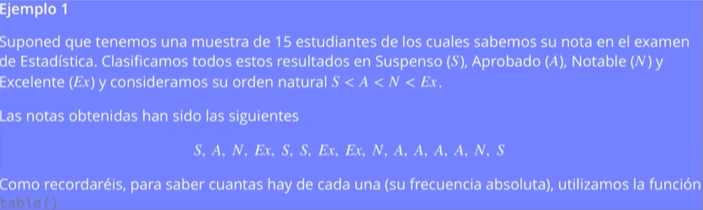

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
notas = np.array(['S', 'A', 'N', 'EX', 'S', 'S', 'EX', 'EX', 'N', 'A', 'A', 'A', 'A', 'N', 'S'])

In [3]:
notas = sorted(notas)
np.unique(notas, return_counts=True)

(array(['A', 'EX', 'N', 'S'], dtype='<U2'), array([5, 3, 3, 4], dtype=int64))

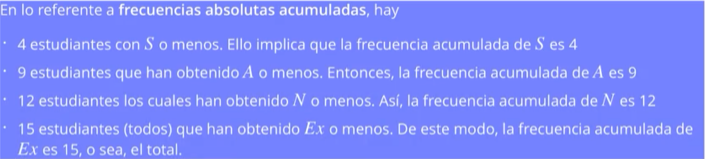

In [4]:
notas1 = np.unique(notas, return_counts=True)[0]
notas2 = np.unique(notas, return_counts=True)[1]

In [5]:
S = notas2[3] / len(notas)
A = (notas2[3] + notas2[0]) / len(notas)
N = (notas2[3] + notas2[1] + notas2[0]) / len(notas)
EX = (notas2[3] + notas2[2] + notas2[1] + notas2[0]) / len(notas)

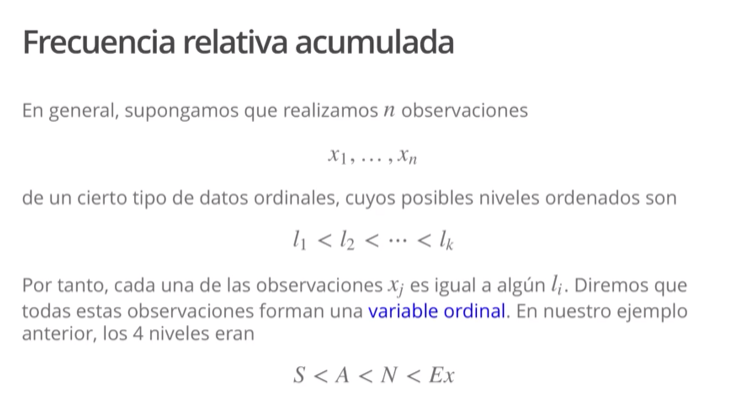

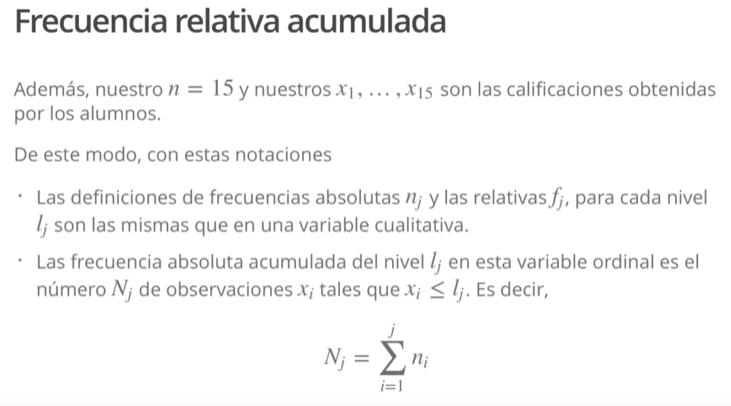

La frecuencia relativa acumulada de nivel $I_{j}$, en esta variable ordinal es la fraccion en tanto por 1 $F_{j}$ de observaciones $x_{i}$ tales que $x_{i} \leq I_{j}$. Es decir:

$$F_{j} = \frac{N_{j}}{n} = \sum^{j}_{i=1} {f_{i}}

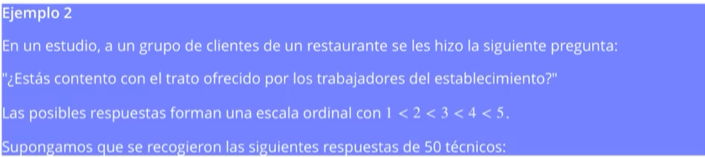

In [6]:
np.random.seed(42)
criticas = np.random.randint(1, 6, size=50)
criticas

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5, 4, 3, 5, 2, 4, 2, 4, 5, 1, 4, 2, 5,
       4, 1, 1, 3, 3, 2, 4, 4, 3, 4, 4, 1, 3, 5, 3, 5, 1, 2, 4, 1, 4, 2,
       2, 1, 2, 5, 2, 4])

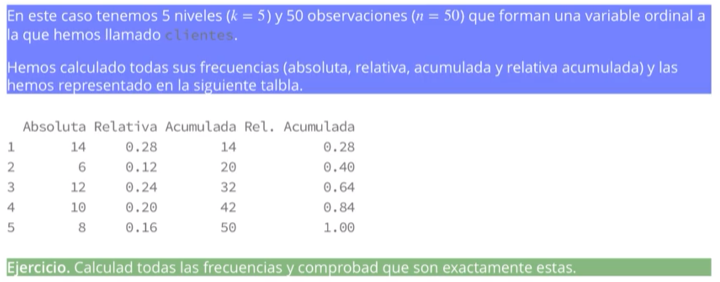

In [7]:
df_tabla = pd.DataFrame(np.unique(criticas, return_counts=True)).T
df_tabla.rename(columns={0:'valoracion', 1:'absoluta'}, inplace=True)
df_tabla.sort_values(by=['valoracion'], ascending=True, inplace=True)
df_tabla['relativa'] = df_tabla['absoluta'] / df_tabla['absoluta'].sum()
df_tabla['acumulada'] = (df_tabla['relativa'] * 100).astype(int, errors='ignore')
df_tabla['rel_acumulada'] = df_tabla['relativa'].cumsum()

In [8]:
df_tabla

,valoracion,absoluta,relativa,acumulada,rel_acumulada
0,1,7,0.14,14,0.14
1,2,10,0.20,20,0.34
2,3,10,0.20,20,0.54
3,4,13,0.26,26,0.80
4,5,10,0.20,20,1.00


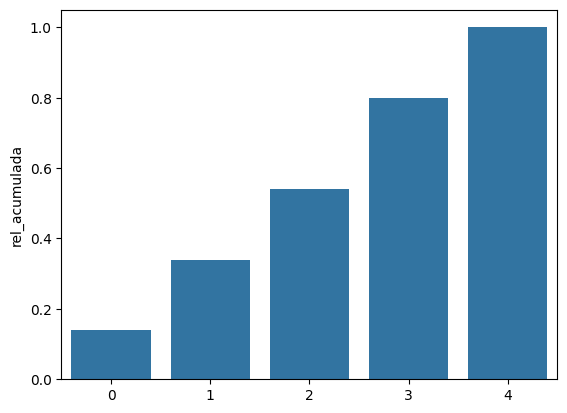

In [9]:
sns.barplot(df_tabla['rel_acumulada']);

#### Datos cuantitavos a factores ordinales

In [13]:
df_crab = pd.read_csv('datacrab.txt', sep = " ")
df_crab.drop('input', axis=1, inplace=True)
df_crab

,color,spine,width,satell,weight
0,3,3,28.3,8,3050
1,4,3,22.5,0,1550
2,2,1,26.0,9,2300
3,4,3,24.8,0,2100
4,4,3,26.0,4,2600
...,...,...,...,...,...
168,4,3,26.1,3,2750
169,4,3,29.0,4,3275
170,2,1,28.0,0,2625
171,5,3,27.0,0,2625


Vamos a convertir a la variable *width* en una variable ordinal que agrupe las entradas de la variable original en niveles.

La manera mas sencilla de llevarlo a cabo es utilizar la función *pandas.cut*, que estudiaremos en detalle en lecciones posteriores. Por ahora, basta con saber que la instrucción dividira el vector numerico bins en intervalos de extremos los puntos especificados en el argumento (pendiente). 

In [16]:
intervalos = pd.cut(df_crab['width'], bins=(21, 25, 29, 33, np.inf), right=False, labels=('21-25', '25-29', '29-33', '33-...'))
df_crab['width'] = intervalos
df_crab

,color,spine,width,satell,weight
0,3,3,25-29,8,3050
1,4,3,21-25,0,1550
2,2,1,25-29,9,2300
3,4,3,21-25,0,2100
4,4,3,25-29,4,2600
...,...,...,...,...,...
168,4,3,25-29,3,2750
169,4,3,29-33,4,3275
170,2,1,25-29,0,2625
171,5,3,25-29,0,2625


In [75]:
df_crab_1 = df_crab[['color','width']].sort_values(by=['color'], ascending=True).copy()

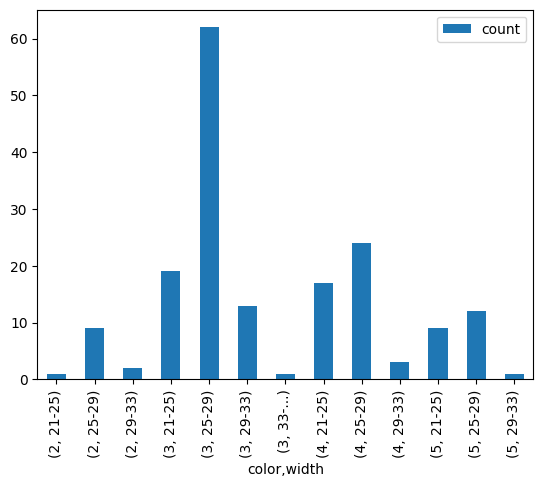

In [104]:
df_crab_1.groupby(['color','width'], as_index=True, observed=True).agg(count=('color','count')).plot.bar();

In [108]:
(df_crab_1.groupby(['color','width'], as_index=True, observed=True).agg(count=('color','count')))

count
color width        
2     21-25       1
      25-29       9
      29-33       2
3     21-25      19
      25-29      62
      29-33      13
      33-...      1
4     21-25      17
      25-29      24
      29-33       3
5     21-25       9
      25-29      12
      29-33       1